In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Part 1
1D Ising chain: spins with nearest-neighbor interactions
The temperature T has units of J/k

Magnetization at Equilibrium: -0.3125



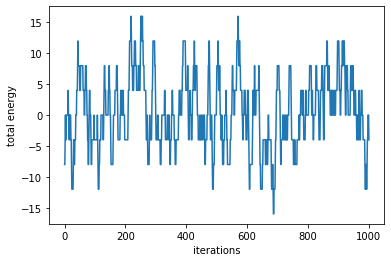

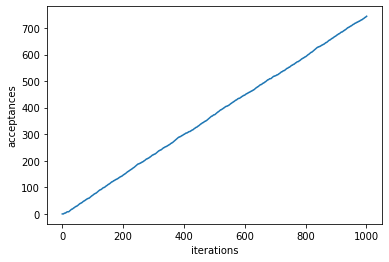

In [613]:
def flip_spin(chain):
    flip = random.randint(0, chain.size-1)
    chain[flip] = -1*chain[flip]
    return chain

def chain_energy(chain):
    i = 0
    J = 1.0#*T    # interaction energy
    E = 0.0    # total energy
    while i < chain.size:
        E += -1.0*J*chain[i]*chain[i-1]
        i += 1
    return E

def main_1D(T):
    #T = 10 # units of J/k
    n = 32    # Number of Spins
    acceptance = 0
    ace = np.zeros(1)
    eq = True
    iteration = 0
    max_iter = 1000#1000
    rej = 0

    ## initialize the ising chain of spins
    # for chain with spins all one direction
    #chain = np.ones(n)
    # for chain with randomized spins
    
    chain = np.random.randint(2,size=n)
    for spin in range(0,n):
        if chain[spin] == 0.0:
            chain[spin] = -1
    
    energies = np.array([chain_energy(chain)])
    
    while eq:
        e1 = chain_energy(chain)
        temp_chain = flip_spin(chain)
        e2 = chain_energy(temp_chain)
        delta_E = e2 - e1

        if delta_E < 0.0:
            acceptance += 1
            ace = np.append(ace,acceptance)
            chain = temp_chain
            energies = np.append(energies,e2)
        else:
            p = np.exp(-delta_E/T)
            r = np.random.random()
            if r <= p:
                acceptance += 1
                ace = np.append(ace,acceptance)
                chain = temp_chain
                energies = np.append(energies,e2)
            else:
                energies = np.append(energies,e1)
                ace = np.append(ace,acceptance)
                rej += 1
        iteration += 1
        if iteration > max_iter:
            eq = False
    #print(rej,'rejections out of',max_iter,'iterations')
    return chain,energies,acceptance
temmp = 1/(3.0)# J = 3 kT, T = 1/3k
chain,energies,acc = main_1D(temmp)
#print(chain)
plt.figure(69)
plt.plot(energies)
plt.xlabel('iterations')
plt.ylabel('total energy')
plt.figure(55)
plt.plot(ace)
plt.xlabel('iterations')
plt.ylabel('acceptances')
maggie = np.average(chain)#np.sum(chain)
print('Magnetization at Equilibrium:',maggie)
#print(np.average(energies[100:]))
print()

In [607]:
divi = 50 #100
avgrange = 10

temperatures = np.linspace(1, 50, divi)
#spins = np.zeros(50)
energies = np.zeros(divi)
Cv = np.zeros(divi)
magnit = np.zeros(divi)
accept = np.zeros(divi)
for i in range(0,divi):
    temp = temperatures[i]
    en = np.zeros(avgrange)
    heatcap = np.zeros(avgrange)
    mag = np.zeros(avgrange)
    a = np.zeros(avgrange)
    for j in range(0,avgrange):
        spin_arr,energy_arr,acc = main_1D(temp)
        avg_energy = np.average(energy_arr)
        avg_sqrd_energy = np.average(np.multiply(energy_arr,energy_arr))
        en[j] = avg_energy
        mag[j] = np.average(spin_arr)
        heatcap[j] = (temp+0.00000001)**-2 * (avg_sqrd_energy - avg_energy**2)
        a[j] = acc
        #sqrd_mag = np.average(np.multiply(spin_arr,spin_arr))
                #np.sum(np.multiply(spin_arr,spin_arr))/len(spin_arr)
        #iso = (temp+0.00000001)**-1 * (sqrd_mag - mag[j]**2)
    #print(en)
    energies[i] = np.mean(en)
    magnit[i] = np.mean(mag)
    Cv[i] = np.mean(heatcap)
    accept[i] = np.mean(a)
        
        #print(avg_energy, avg_sqrd_energy, avg_spin, avg_sqrd_spin)


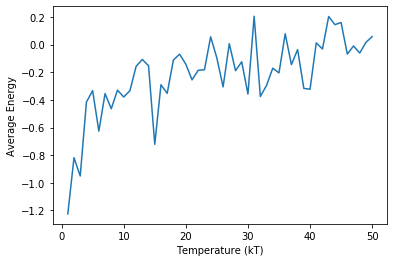

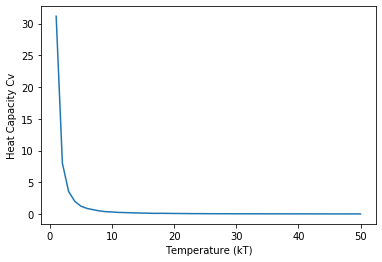

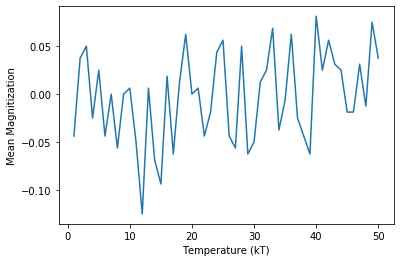

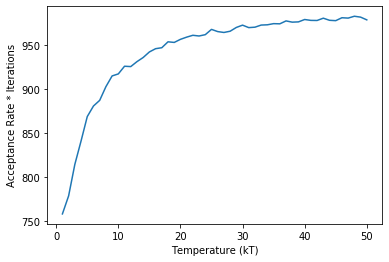

In [612]:
plt.figure(1)
plt.plot(temperatures,energies)
plt.xlabel('Temperature (kT)')
plt.ylabel('Average Energy')
#plt.savefig('1D_Energy.png')

plt.figure(2)
plt.plot(temperatures,Cv)
plt.xlabel('Temperature (kT)')
plt.ylabel('Heat Capacity Cv')
#plt.savefig('1D_Cv.png')

plt.figure(3)
plt.plot(temperatures,magnit)
plt.xlabel('Temperature (kT)')
plt.ylabel('Mean Magnitization')
#plt.savefig('1D_Mag.png')

plt.figure(4)
plt.plot(temperatures,accept)
plt.xlabel('Temperature (kT)')
plt.ylabel('Acceptance Rate * Iterations')

#print(np.mean(magnit))
#print(spin_arr)
print()

The project was taken to be in unity for simplicity's sake, so that k = 1.0.

Questions/Tasks:
1. Why, in eq. (1), are we not also considering $s_{i-1}$ when computing the energy, it is a nearest neighbor after all? Discuss.

We do not consider $s_{i-1}$ when computing the energy because of the ising chain's toroidal nature. The energy between neighbors is found sequentially, so the energy between $s_{i}$ and $s_{i-1}$ will be found separately. 

2. One generally chooses J>0.  What does that imply for the energetically favored orientation of nearest neighbors? Discuss. Explore what happens when you choose J<0.

J>0 implies that the favored orientation of the nearest neigbors is parallel. Because J is positive, the neighboring spins will 'want' to be in the same direction. When J<0, the spins will tend towards being anti-parallel, spinning in opposite directions. 

3. How do you decide if and when the system has reached equilibrium? Discuss. 

The system reaches equilibrium after the total energy has started to oscillate around one value. It will never stay exactly at one energy, as spins will still randomly flip once the system has reached equilibrium, but the energy of the system is considered to be the average once it reaches equilibrium. 

4. How does the acceptance rate evolve upon approaching equilibrium? Discuss. 

The acceptance rate increases as the system approaches equilibrium, because the change in energy as the system oscillates at equilibrium is small enough that the probability $p = e^{-\Delta E / kT}$ is close to 1 and the random number generated is always less than it, or the change in energy is negative and the spin flip is automatically accepted. 

5. For N=32 compute, plot and discuss the temperature dependence of equilibrium quantities of interest such as the energy $E$, the magnetization $M$ and the heat capacity $C$.  Note: although $C = \frac{dE}{dT}$,  taking the derivative numerically is something to be avoided (very noise sensitive).  Therefore, you may want to compute it by other means.  In presenting and discussing your results, be clear about the initial conditions you chose, your requirements for equilibrium, the temperature, and value of J, etc. 


![](1D_Energy.png "Energy v T")
The energy starts low, but increases towards zero as the temperature increases. At high temperatures, the spins are randomized and tend to be anti-parallel with their neighbors, meaning that the energy will be closer to zero. 
![](1D_Cv.png "Cv v T")
Found using $\frac{1}{T^2}(<E^2> - <E>^2)$. Since Cv depends on $T^{-2}$, the plot of it versus temperature approaches infinity at low temperatures. The temperature dependence dominates, but there should be some sort of peak near what would be the critical temperature, where the energy transitions from $E < 0$ to $E \sim 0$.
![](1D_Mag.png "Magnetization v T")
The mean magnetization oscillates around $M = 0$, as even at equilibrium there are spins flipping randomly and making the sum of the spins non-zero. 


6. Finally, take a case for which  J=3kT (low temperature case) and start with randomized spin orientations. Compute the magnetization at equilibrium.  The magnetization as found analytically is given by: 
$m = \frac{sin(\beta H)}{(sin^2(\beta H)+e^{-4 \beta J})^{1/2}}$
and equals 0 so long no external field is applied (H=0).  Only at T=0 does the 1D Ising model become ferromagnetic, that is, has it m!=0 when H=0. How does that compare to your simulation? How well does your simulation capture low temperature behavior? Is the Metropolis algorithm (acceptance rate) very efficient at low temperatures?  Discuss.   

The magnetization at equilibrium is $-1 < m < +1$, which is not exactly zero as expected from the equation. Instead, the magnetization varies at or around zero. The metropolis algorithm is more efficient at high temperatures than at low temperatures, because the probability of a flip being accepted depends on the temperature, and higher temperatures bring that probability closer to one. 

## Part 2
The 2D Ising Model

In [621]:
def flip_spin_2D(chain,beta):
    sh = chain.shape
    nspins = sh[0]*sh[1]
    flip_row = random.randint(0, sh[0]-1)
    flip_col = random.randint(0, sh[1]-1)
    loc = (flip_row,flip_col)
    pockrow = np.array([flip_row])
    pockcol = np.array([flip_col])
    clustrow = np.array([flip_row])
    clustcol = np.array([flip_col])
    #print(flip_row,flip_col)
    p = 1 - np.exp(-2*beta)
    run = 0
    t = True
    while pockrow.size != 0 and clustrow.size <= nspins:
        run += 1
        row = pockrow[0]
        col = pockcol[0]
            
        #up
        if row-1 < sh[0]: y = sh[0]-1
        else: y = row-1
        x = col
        r = np.random.random()
        inclust = loc_in_list(y,x,clustrow,clustcol)
        inpock = loc_in_list(y,x,pockrow,pockcol)
        if r < p and not inclust and not inpock:
            #print('up added to pocket')
            pockrow = np.append(pockrow,y)
            pockcol = np.append(pockcol,x)
            clustrow = np.append(clustrow,y)
            clustcol = np.append(clustcol,x)
            
        #down 
        if row+1 >= sh[0]: y = 0
        else: y = row+1
        x = col
        r = np.random.random()
        inclust = loc_in_list(y,x,clustrow,clustcol)
        inpock = loc_in_list(y,x,pockrow,pockcol)
        if r < p and not inclust and not inpock:
            #print('down added to pocket')
            pockrow = np.append(pockrow,y)
            pockcol = np.append(pockcol,x)
            clustrow = np.append(clustrow,y)
            clustcol = np.append(clustcol,x)
            
        #left 
        y = row
        if col-1 < 0: x = sh[1]-1
        else: x = col-1
        r = np.random.random()
        inclust = loc_in_list(y,x,clustrow,clustcol)
        inpock = loc_in_list(y,x,pockrow,pockcol)
        if r < p and not inclust and not inpock:
            #print('left added to pocket')
            pockrow = np.append(pockrow,y)
            pockcol = np.append(pockcol,x)
            clustrow = np.append(clustrow,y)
            clustcol = np.append(clustcol,x)
            
        #right
        if col+1 >= sh[1]: col = 0
        else: x = col+1
        y = row
        r = np.random.random()
        inclust = loc_in_list(y,x,clustrow,clustcol)
        inpock = loc_in_list(y,x,pockrow,pockcol)
        if r < p and not inclust and not inpock:
            #print('right added to pocket')
            pockrow = np.append(pockrow,y)
            pockcol = np.append(pockcol,x)
            clustrow = np.append(clustrow,y)
            clustcol = np.append(clustcol,x)
        
        pockrow = np.delete(pockrow,0)
        pockcol = np.delete(pockcol,0)
        #print('Number of runs:',run)
        t = False
            
    # when pocket.size == 0
    #print(clustrow)
    #print(clustcol)
    for i in range(0, clustrow.size):
        row = clustrow[i]
        col = clustcol[i]
        chain[row,col] = -1*chain[row,col]
            
    return chain

def loc_in_list(row, col, rowlist, collist):
    v = False
    for i in range(0, rowlist.size):
        if row == rowlist[i] and col == collist[i]:
            v = True
    return v
    
def chain_energy_2D(chain):
    J = 1.0
    siz = chain.shape
    #up = np.zeros(siz)
    down = np.zeros(siz)
    left = np.zeros(siz)
    for row in range(0,siz[0]):
        for col in range(0,siz[1]):
            #up[row,col] = chain[row-1,col]
            if row >= siz[0]-1:
                down[row,col] = chain[0,col]
            else:
                down[row,col] = chain[row+1,col]
            left[row,col] = chain[row, col-1]
    #comb = np.add(up,left)
    comb = np.add(down,left)
    tot = -1*J*np.multiply(chain,comb)
    energy = np.sum(chain)
    return energy    
    
'''#chain = np.ones((3,3))
#print(chain)
#chain, flip_row, flip_col = flip_spin_2D(chain)
chain = np.array([[-1, 1, 1],[1, -1, 1],[1, 1, -1]])
print(chain)
en = chain_energy_2D(chain)
print(en)'''

chain = np.ones((5,5))
print(chain)
chain = flip_spin_2D(chain,1./3)
print(chain)

print()

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]]



2.415944540727903 2.460758800164361



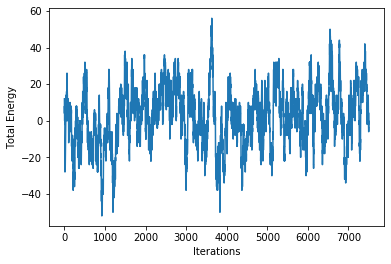

In [655]:
def main_2D(beta):
    # beta = 1/kT
    M = 16
    N = 16
    #chain = np.ones((N,M)) # Spins all oriented in the same direction
    # spins all randomly oriented 
    chain = np.zeros((N,M))
    for row in range(0,N):
        for col in range(0,M):
            chain[row,col] = np.random.randint(2)
            if chain[row,col] == 0:
                chain[row,col] = -1
    
    init_en = chain_energy_2D(chain)
    energies = np.array([init_en])
    #print(chain)
    
    iteration = 0
    max_iter = 7500
    eq = False
    
    while not eq:
        iteration += 1
        chain = flip_spin_2D(chain,beta)
        e2 = chain_energy_2D(chain)
        energies = np.append(energies,e2)
        #print(chain)
        
        if iteration >= max_iter:
            eq = True
    return chain,energies

chain,energies = main_2D(1./(10))
plt.plot(energies)
plt.xlabel('Iterations')
plt.ylabel('Total Energy')
print(np.average(energies),np.average(energies[200:]))


print()

In [649]:
'''
chain1,energies1 = main_2D(1./(0.1))
chain2,energies2 = main_2D(1./(5))
plt.figure(11)
plt.plot(energies1)
plt.figure(12)
plt.plot(energies2)
'''

print()

In [502]:
print(np.sum(chain1))
print(np.sum(chain2))

16.0
-8.0


In [645]:
### DO NOT RUN IF YOU DONT WANT TO WAIT FOREVER
divi = 50
avgrange = 1
temperatures = np.linspace(0.5, 6, divi)
k = 1.38064852*10**-23
en_v_T = np.zeros(divi)
Cv_v_T = np.zeros(divi)
mag_v_T = np.zeros(divi)


for i in range(0,divi):
    temp = temperatures[i]
    en = np.zeros(avgrange)
    heatcap = np.zeros(avgrange)
    mag = np.zeros(avgrange)
    #print('check 1')
    for j in range(0,avgrange):
        #print('check 2')
        spin_arr,energy_arr = main_2D(chain,1./(temp))
        #print('check 3')
        avg_energy = np.average(energy_arr[-50:])
        avg_sqrd_energy = np.average(np.multiply(energy_arr[-50:],energy_arr[-50:]))
        en[j] = avg_energy
        mag[j] = np.average(spin_arr.flatten())
        heatcap[j] = (temp)**-2 * (avg_sqrd_energy - avg_energy**2)
    #print('check 4')
    en_v_T[i] = np.mean(en)
    Cv_v_T[i] = np.mean(heatcap)
    mag_v_T[i] = np.mean(mag)
    
    if i % (divi/10) == 0:
        print(i*int(100/divi)+10,end=' ')
    

10 20 30 40 50 60 70 80 90 100 

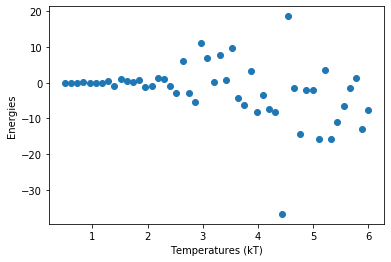

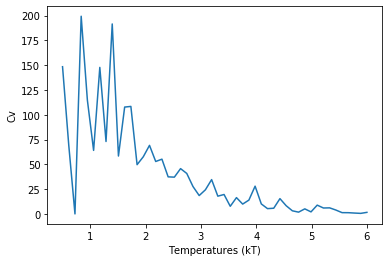

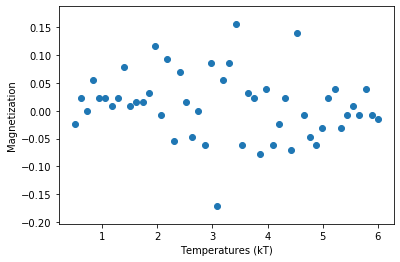

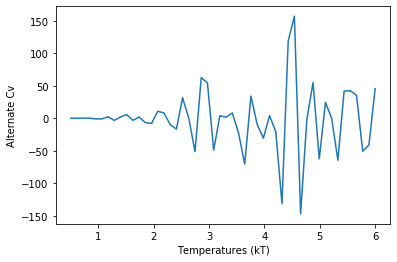

In [646]:
plt.figure(6)
plt.scatter(temperatures, en_v_T)
plt.xlabel('Temperatures (kT)')
plt.ylabel('Energies')

plt.figure(7)
plt.plot(temperatures[:], Cv_v_T[:])
plt.xlabel('Temperatures (kT)')
plt.ylabel('Cv')

plt.figure(8)
plt.scatter(temperatures, mag_v_T)
plt.xlabel('Temperatures (kT)')
plt.ylabel('Magnetization')

plt.figure(9)
Cv_real = np.gradient(en_v_T,temperatures)
plt.plot(temperatures, Cv_real)
plt.xlabel('Temperatures (kT)')
plt.ylabel('Alternate Cv')
print()

Now that you have very fast algorithm you can explore the temperature dependence of the 
of equilibrium quantities of interest such as the energy 𝐸, the magnetization 𝑀 and the 
heat capacity 𝐶.  Discuss the main difference you find between the 1D and 2D simulation 
results.  To do so choose a reasonable size of the lattice up to 32x32 if still sufficiently fast.  
In presenting and discussing your results, be clear about the initial conditions you chose, 
your requirements for equilibrium, the temperature, and value of 𝐽, etc.   